# Phase 01 -  Data Wrangling 
###  First we need to read and explore each dataset, find any "bad formatation" or null value.
    * PEA07-Estimated_Pupulation-1996-2017.csv

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#Datasets:
pea07="./Datasets/PEA07-Estimated_Pupulation-1996-2017.csv"
pea04 ="./Datasets/PEA04-Estimated_Pupulation-2011-2023.csv" 
cjq01 ="./Datasets/CJQ01-recorded_crime_2002-2023.csv"


# the fist dataset will be pea07
pea07=pd.read_csv(pea07)
pea07.head()


,Statistic,Age Group,Sex,Year,UNIT,State,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West
0,Estimated Population (Persons in April),All ages,Both sexes,1996,Thousand,3626.1,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6
1,Estimated Population (Persons in April),All ages,Both sexes,1997,Thousand,3664.3,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1
2,Estimated Population (Persons in April),All ages,Both sexes,1998,Thousand,3703.1,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8
3,Estimated Population (Persons in April),All ages,Both sexes,1999,Thousand,3741.6,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3
4,Estimated Population (Persons in April),All ages,Both sexes,2000,Thousand,3789.5,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1


## Now we need to drop unicessary columns, and rename the other ones.
     To prevent any error if run this cell twice, we can create a function to rename columns.


In [2]:
# This funcion receive the variables: dataset, original column name and new column name.
# and try to rename the column, if the column doenst exist or it is alread renamed,  it will go to except.
def rename_col(df, old_col, new_col):
  try:
    df = df.rename(columns={old_col: new_col})
    return df
  except KeyError:
    print(f"Column {column} does not exist or has already been renamed.")
    pass

pea07 = rename_col(pea07, 'State', 'Total')

pea07.columns

Index(['Statistic', 'Age Group', 'Sex', 'Year', 'UNIT', 'Total', 'Border',
       'Midland', 'West', 'Dublin', 'Mid-East', 'Mid-West', 'South-East',
       'South-West'],
      dtype='object')

In [3]:
# Lets get the columns in the right local and right name.

pea07 = pea07.loc[:,['Year', 'Border',
       'Midland', 'West', 'Dublin', 'Mid-East', 'Mid-West', 'South-East',
       'South-West', 'Total', 'UNIT']]
pea07.head()

,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,UNIT
0,1996,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6,3626.1,Thousand
1,1997,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1,3664.3,Thousand
2,1998,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8,3703.1,Thousand
3,1999,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3,3741.6,Thousand
4,2000,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1,3789.5,Thousand


# Now Lets check if is there any null or bad variable.


In [4]:
print(pea07.info(), pea07.isnull().sum() )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        22 non-null     int64  
 1   Border      22 non-null     float64
 2   Midland     22 non-null     float64
 3   West        22 non-null     float64
 4   Dublin      22 non-null     float64
 5   Mid-East    22 non-null     float64
 6   Mid-West    22 non-null     float64
 7   South-East  22 non-null     float64
 8   South-West  22 non-null     float64
 9   Total       22 non-null     float64
 10  UNIT        22 non-null     object 
dtypes: float64(9), int64(1), object(1)
memory usage: 2.0+ KB
None Year          0
Border        0
Midland       0
West          0
Dublin        0
Mid-East      0
Mid-West      0
South-East    0
South-West    0
Total         0
UNIT          0
dtype: int64



# Now We have organized and checkd the first file, lets do the same with the 2º File:
* PEA04-Estimated_Pupulation-2011-2023.csv

In [33]:
# pandas and numpy already imported at the begining of this notebook

pea04 = pd.read_csv(pea04)
print(pea04.head())



                                 STATISTIC  Year Age Group         Sex  \
0  Estimated Population (Persons in April)  2011  All ages  Both sexes   
1  Estimated Population (Persons in April)  2012  All ages  Both sexes   
2  Estimated Population (Persons in April)  2013  All ages  Both sexes   
3  Estimated Population (Persons in April)  2014  All ages  Both sexes   
4  Estimated Population (Persons in April)  2015  All ages  Both sexes   

       UNIT   State  Border   West  Mid-West  South-East  South-West  Dublin  \
0  Thousand  4574.9   391.9  440.8     466.8       410.3       662.3  1261.5   
1  Thousand  4593.7   392.1  439.4     470.6       411.6       667.4  1260.6   
2  Thousand  4614.7   393.1  441.7     470.7       413.7       673.8  1265.9   
3  Thousand  4645.4   392.0  441.1     471.8       413.5       679.5  1286.4   
4  Thousand  4687.8   391.9  442.2     473.4       415.6       678.9  1315.3   

   Mid-East  Midland  
0     657.4    283.8  
1     664.7    287.2  
2    

# To rename the column in this dataframe, we can use the first function We'd cerated for the first dataframe.
    Functions are part of "Functional Programing" and the advantage of functions is that we can make the code reusable, and we dont need to write the same code over and over again.

In [34]:
## Now we need to drop unicessary columns, and rename the other ones.
# To prevent any error if run this cell twice, we can create a function to rename columns.

pea04 = rename_col(pea04, 'State', 'Total')

pea04.columns

Index(['STATISTIC', 'Year', 'Age Group', 'Sex', 'UNIT', 'Total', 'Border',
       'West', 'Mid-West', 'South-East', 'South-West', 'Dublin', 'Mid-East',
       'Midland'],
      dtype='object')

In [35]:
# Lets get the columns in the right local and right name.

pea04 = pea04.loc[:,['Year', 'Border',
       'Midland', 'West', 'Dublin', 'Mid-East', 'Mid-West', 'South-East',
       'South-West', 'Total', 'UNIT']]
pea04.head()

,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,UNIT
0,2011,391.9,283.8,440.8,1261.5,657.4,466.8,410.3,662.3,4574.9,Thousand
1,2012,392.1,287.2,439.4,1260.6,664.7,470.6,411.6,667.4,4593.7,Thousand
2,2013,393.1,289.3,441.7,1265.9,666.4,470.7,413.7,673.8,4614.7,Thousand
3,2014,392.0,289.8,441.1,1286.4,671.4,471.8,413.5,679.5,4645.4,Thousand
4,2015,391.9,291.1,442.2,1315.3,679.3,473.4,415.6,678.9,4687.8,Thousand


##  As we know, the second dataset has  data from 2011 to 2023, we need to filter the first dataframe,  getting data from 1996 to 2010 and after all We will merge the dataframes into an one and We'll call "population_df"

In [36]:
# filter second dataset, to get values from 2018 to 2023
pea07 = pea07[(pea07['Year'] <= 2010)]


#  Merging process

    When we merge dataframes, pandas will create columns _x and _y, and fill the new rows with "NaN" (null) values.  
    
    To merge DataFrames properly, we need to perform the following tasks:
    * Merge datasets
    * Fill the NaN values in the _y columns with the respective value of _x
    * Drop the _x columns
   
     

In [37]:
# Merge the two DataFrames on the 'Year' column
population_df = pea07.merge(pea04, on='Year', how='outer')
population_df.tail()

,Statistic,Age Group,Sex,Year,UNIT_x,State,Border_x,Midland_x,West_x,Dublin_x,...,Border_y,Midland_y,West_y,Dublin_y,Mid-East_y,Mid-West_y,South-East_y,South-West_y,Total,UNIT_y
23,NaN,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,...,409.9,309.0,464.8,1398.8,731.9,493.4,440.1,710.6,4958.5,Thousand
24,NaN,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,...,412.0,309.9,472.2,1422.4,747.2,497.9,444.9,723.3,5029.9,Thousand
25,NaN,NaN,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,...,417.1,314.2,475.4,1434.6,755.3,499.6,451.2,727.4,5074.7,Thousand
26,NaN,NaN,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,...,422.2,320.3,486.7,1468.4,774.0,508.7,460.7,743.0,5184.0,Thousand
27,NaN,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,...,432.1,324.6,500.8,1501.5,777.1,519.6,468.6,757.4,5281.6,Thousand


### As you can see, we have columns _x and _y, now lets fill the NaN values

In [38]:
# Getting the collumns names
column_names = population_df.columns
column_names

Index(['Statistic', 'Age Group', 'Sex', 'Year', 'UNIT_x', 'State', 'Border_x',
       'Midland_x', 'West_x', 'Dublin_x', 'Mid-East_x', 'Mid-West_x',
       'South-East_x', 'South-West_x', 'Border_y', 'Midland_y', 'West_y',
       'Dublin_y', 'Mid-East_y', 'Mid-West_y', 'South-East_y', 'South-West_y',
       'Total', 'UNIT_y'],
      dtype='object')

In [39]:
# Filling the columns from the first dataset with the values of the second dataset.
# The loop for will check the name in each item of the list column_names and if the column name ends with _x, 
# it will fill with values of the same column ended in _y.

for column_name in population_df.columns:
    if column_name.endswith('_x'):
        population_df[column_name].fillna(population_df[column_name[:-2]+'_y'], inplace=True)
    
population_df.tail() 

,Statistic,Age Group,Sex,Year,UNIT_x,State,Border_x,Midland_x,West_x,Dublin_x,...,Border_y,Midland_y,West_y,Dublin_y,Mid-East_y,Mid-West_y,South-East_y,South-West_y,Total,UNIT_y
23,NaN,NaN,NaN,2019,Thousand,NaN,409.9,309.0,464.8,1398.8,...,409.9,309.0,464.8,1398.8,731.9,493.4,440.1,710.6,4958.5,Thousand
24,NaN,NaN,NaN,2020,Thousand,NaN,412.0,309.9,472.2,1422.4,...,412.0,309.9,472.2,1422.4,747.2,497.9,444.9,723.3,5029.9,Thousand
25,NaN,NaN,NaN,2021,Thousand,NaN,417.1,314.2,475.4,1434.6,...,417.1,314.2,475.4,1434.6,755.3,499.6,451.2,727.4,5074.7,Thousand
26,NaN,NaN,NaN,2022,Thousand,NaN,422.2,320.3,486.7,1468.4,...,422.2,320.3,486.7,1468.4,774.0,508.7,460.7,743.0,5184.0,Thousand
27,NaN,NaN,NaN,2023,Thousand,NaN,432.1,324.6,500.8,1501.5,...,432.1,324.6,500.8,1501.5,777.1,519.6,468.6,757.4,5281.6,Thousand


In [50]:
#function to rename the columns merged,  remove the '_x' at the end.

# function rename_columns  will check into columns list, and each column ended in _x, the _x (-2 letters) will be removed.

def rename_columns_x(df):

  # Create a list of the new column names.
  new_column_names = []
  for column_name in population_df.columns:
    if column_name.endswith('_x'):
      new_column_name = column_name[:-2]
    else:
      new_column_name = column_name

    new_column_names.append(new_column_name)

  # Rename the columns of the DataFrame.
  population_df.columns = new_column_names

  return df

# Rename the columns of the DataFrame.
population_df = rename_columns_x(population_df)


# Getting only the necesary columns:




population_df.head()





,Statistic,Age Group,Sex,Year,UNIT,State,Border,Midland,West,Dublin,...,Border_y,Midland_y,West_y,Dublin_y,Mid-East_y,Mid-West_y,South-East_y,South-West_y,Total,UNIT_y
0,Estimated Population (Persons in April),All ages,Both sexes,1996,Thousand,3626.1,407.3,205.5,352.4,1058.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Estimated Population (Persons in April),All ages,Both sexes,1997,Thousand,3664.3,408.2,208.5,354.0,1072.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Estimated Population (Persons in April),All ages,Both sexes,1998,Thousand,3703.1,410.6,211.0,355.8,1081.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Estimated Population (Persons in April),All ages,Both sexes,1999,Thousand,3741.6,414.8,213.8,356.8,1086.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Estimated Population (Persons in April),All ages,Both sexes,2000,Thousand,3789.5,420.5,216.4,362.6,1097.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# This for loop will drop every column ended with _y 
for col in population_df.columns:
    if col.endswith("_y"):
        population_df.drop(col, axis=1, inplace=True)

population_df

,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,UNIT
0,1996,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6,3626.1,Thousand
1,1997,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1,3664.3,Thousand
2,1998,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8,3703.1,Thousand
3,1999,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3,3741.6,Thousand
4,2000,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1,3789.5,Thousand
5,2001,425.0,220.5,368.6,1108.2,401.2,335.3,416.5,572.2,3847.2,Thousand
6,2002,432.5,225.4,380.3,1122.8,412.6,339.6,423.6,580.4,3917.2,Thousand
7,2003,439.6,230.4,389.1,1133.2,426.5,342.4,430.4,588.4,3979.9,Thousand
8,2004,449.8,236.4,394.1,1144.8,440.0,345.6,438.0,596.4,4045.2,Thousand
9,2005,457.5,241.9,405.6,1160.6,456.9,353.1,449.0,609.2,4133.8,Thousand


In [14]:
# Checking if is there any null variable or misformated.
print(population_df.isnull().sum())
print(population_df.info())

Year          0
Border        0
Midland       0
West          0
Dublin        0
Mid-East      0
Mid-West      0
South-East    0
South-West    0
Total         0
UNIT          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        28 non-null     int64  
 1   Border      28 non-null     float64
 2   Midland     28 non-null     float64
 3   West        28 non-null     float64
 4   Dublin      28 non-null     float64
 5   Mid-East    28 non-null     float64
 6   Mid-West    28 non-null     float64
 7   South-East  28 non-null     float64
 8   South-West  28 non-null     float64
 9   Total       28 non-null     float64
 10  UNIT        28 non-null     object 
dtypes: float64(9), int64(1), object(1)
memory usage: 2.5+ KB
None


# Exploring the Recorded crime dataset
"./Datasets/CJQ01-recorded_crime_2002-2023.csv"

In [46]:
# cjq01  variable already inicialized at the begining of this notebook.

cjq01=pd.read_csv(cjq01)
cjq01.head(10)

,STATISTIC Label,Quarter,Type of Offence,UNIT,VALUE
0,Recorded crime incidents (Under Reservation),2003Q1,Homicide offences,Number,28.0
1,Recorded crime incidents (Under Reservation),2003Q1,Murder,Number,10.0
2,Recorded crime incidents (Under Reservation),2003Q1,Manslaughter,Number,7.0
3,Recorded crime incidents (Under Reservation),2003Q1,Infanticide,Number,0.0
4,Recorded crime incidents (Under Reservation),2003Q1,Dangerous driving leading to death,Number,11.0
5,Recorded crime incidents (Under Reservation),2003Q1,Sexual offences,Number,575.0
6,Recorded crime incidents (Under Reservation),2003Q1,Rape of a male or female,Number,105.0
7,Recorded crime incidents (Under Reservation),2003Q1,Defilement of a boy or girl less than 17 years...,Number,47.0
8,Recorded crime incidents (Under Reservation),2003Q1,Sexual offence involving mentally impaired person,Number,4.0
9,Recorded crime incidents (Under Reservation),2003Q1,Aggravated sexual assault,Number,2.0


# For this dataset we need to group by year, removing tue "Quarter" we will keep the "Type of Offence" to explore some plots.

In [47]:
# Dropping the fist column - It is not necessary
# To garantee thate we dont drop the wrong column, we can create a conditional, comparing the column name.
if cjq01.columns[0] == 'STATISTIC Label':
    cjq01 = cjq01.drop(cjq01.columns[0], axis=1)

cjq01.head()


,Quarter,Type of Offence,UNIT,VALUE
0,2003Q1,Homicide offences,Number,28.0
1,2003Q1,Murder,Number,10.0
2,2003Q1,Manslaughter,Number,7.0
3,2003Q1,Infanticide,Number,0.0
4,2003Q1,Dangerous driving leading to death,Number,11.0


In [51]:
# To remove the 'Quarter' from each year, we need to split the 'Quarter' column into a list of strings
cjq01['Quarter'] = cjq01['Quarter'].str.split('Q')

# Now we can get the first element of the list, the year.
cjq01['Quarter'] = cjq01['Quarter'].str.get(0)


# Also, we can rename the column Quarter to Year, using the function I have created.
# The function uses 3 inputs: dataset name, current column name, new column name
  
    
cjq01 = rename_col(cjq01, 'Quarter', 'Year')


cjq01.head(5)


,Year,Type of Offence,UNIT,VALUE
0,2003,Homicide offences,Number,28.0
1,2003,Murder,Number,10.0
2,2003,Manslaughter,Number,7.0
3,2003,Infanticide,Number,0.0
4,2003,Dangerous driving leading to death,Number,11.0


In [52]:
print(cjq01.info(), cjq01.isnull().sum() )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             6150 non-null   object 
 1   Type of Offence  6150 non-null   object 
 2   UNIT             6150 non-null   object 
 3   VALUE            6149 non-null   float64
dtypes: float64(1), object(3)
memory usage: 192.3+ KB
None Year               0
Type of Offence    0
UNIT               0
VALUE              1
dtype: int64


### We can observe that in this dataset, the column quarter is shown as object , and there is one value null on the column VALUE. lets check it.
    Its possible to check if the column Quarter has only numbers by poloting a boxplot.
    Also we can get the null value from column 'VALUE" and replace by 0.

<Axes: >

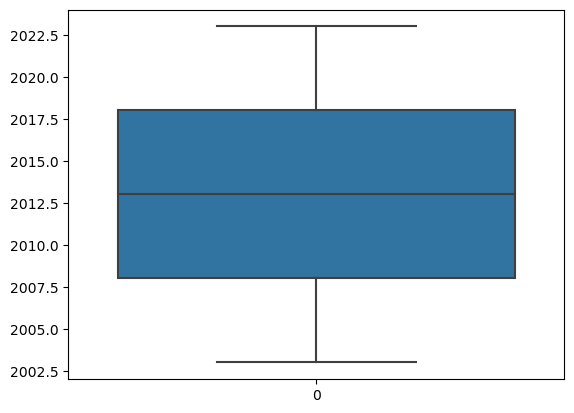

In [62]:
#seaborn already imported at the begining of this notebook:
#import seaborn as sns 
sns.boxplot(data=cjq01["Year"])

# As the boxplot is shown, the column Year has only numbers,"Years"


In [55]:
cjq01.sort_values(by='VALUE', ascending=True)

,Year,Type of Offence,UNIT,VALUE
3024,2013,Unseaworthy/dangerous use of boat or ship,Number,0.0
1578,2008,Infanticide,Number,0.0
2997,2012,Organisation of crime and conspiracy to commit...,Number,0.0
480,2004,Human trafficking offences,Number,0.0
474,2004,Unseaworthy/dangerous use of boat or ship,Number,0.0
...,...,...,...,...
1616,2008,Theft and related offences,Number,20049.0
3491,2014,Theft and related offences,Number,20144.0
3566,2014,Theft and related offences,Number,20155.0
3191,2013,Theft and related offences,Number,20707.0


In [56]:
# As we have one value null, and it can be replaced by 0,  we can replace:

cjq01['VALUE'].fillna(0, inplace=True)


#  Phase 2 - EDA - Visualization
    Now that we have all data organized and clean, we can perform some Visualizations and Plots, First We can get some 
    insights about the population growth, using the "population_df" dataframe. And after we can check some information about the crime rate.
    
 

#The first plot will be a line chart with the population grow over the time

# Outliers
    Outliers are data points significantly different from the rest of the data, Outliers can be caused by errors in data collection or entry, or they can be genuine data points that represent unusual or unexpected events.
    By plotting a boxplor, we can detect outliers.
  
There are a number of different methods for detecting outliers. One common approach is to use statistical methods to calculate the mean, median, and standard deviation of the data. Outliers are then identified as data points that fall outside of a certain number of standard deviations from the mean.

Another approach to detecting outliers is to use 
visualization methods, such as scatter plots and boxplots. These methods can be used to identify data points that are visually distinct from the rest of the data

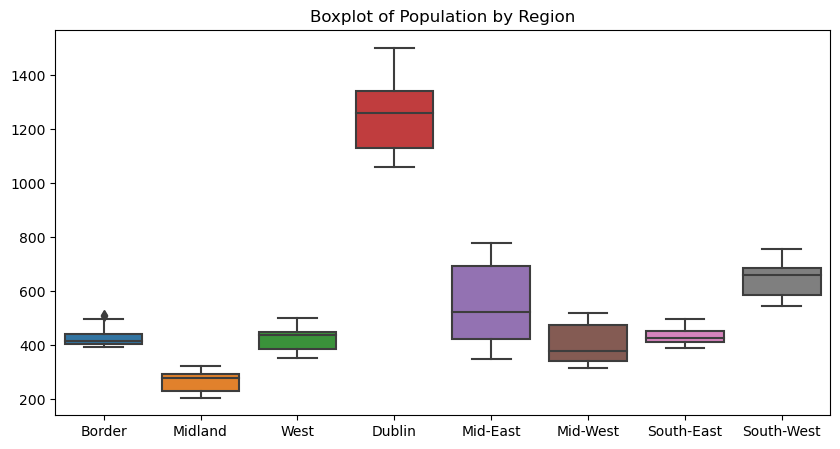

In [57]:
import seaborn as sns 
# Get the columns names using: population_df.columns  and plot the boxplot with specific column

plt.figure(figsize=(10, 5)) # set the figure size
plt.title("Boxplot of Population by Region") # Add a title to the boxplot
sns.boxplot(data=population_df[['Border', 'Midland', 'West', 'Dublin', 'Mid-East', 'Mid-West',
       'South-East', 'South-West']])

# Show the plot
plt.show()

## From this boxplot we can get some Insights:
    The median population of the "Border" region is the highest
    Overall, the boxplot shows that there is a significant variation in population between the different regions. The Border and West regions have the highest populations, while the South-West region has the lowest population.

Here are a question that we can answer based on the boxplot:

    Which region has the highest median population? 
        The Border region has the highest median population.

# From the Line charts we can get the following insights:

* Trends: we can identify trends, such as whether the population is increasing, decreasing, or remaining stable.
* Relationships: We can identify relationship between two variables.
* Comparisons: We can compare two or more variables over time. This can be useful for identifying differences between regions.


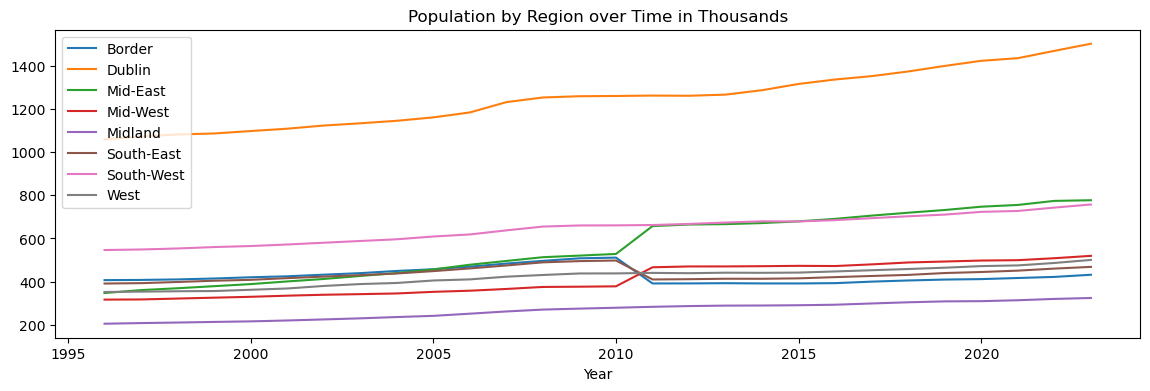

In [58]:
import matplotlib.pyplot as plt

# Resize the chart to be wider
fig, ax = plt.subplots(figsize=(14, 4))

# Here I will plot a line chart of the population growth for each `Region`
population_df.plot(kind='line', x='Year', y=['Border', 'Dublin', 'Mid-East', 'Mid-West', 'Midland', 'South-East', 'South-West',  'West'], ax=ax)

ax.set_title('Population by Region over Time in Thousands')
plt.show()

### Insights:

One of the most obvious insights is the overall growth of Ireland's population over time, The chart shows the regional variation in population growth. Some regions, such as Dublin and the surrounding counties, have experienced more rapid growth than others. This is due to a number of factors, including economic opportunity and migration.

Also, its possible observe some anomalies in the lines blue and brown, show the decrease of the population.

Finally, the chart can provide insights into the future of Ireland's population. By analyzing the trends in population growth, demographers can make predictions about the future size and distribution of the population

# Pie Chart
    From Pie charts we can get following insights:

    Composition: From Pie charts we can get how a whole is divided into its constituent parts.
    Comparisons: We can also compare the population of each region. This can be useful for identifying similarities and differences between different regions.
    Trends: We can also plot more than one Pie chart and observe how it changes over time.

### Note:
    Pie chart need a 1D array as input. so we need to convert the data variable to a 1D array. 
    Using numpy.ravel() function we can flattens a NumPy array into a 1D array.
    
   ###  In this case, we will plot two Pie Carts one with data from 2013 and other with data from 2023:
    From these charts, we can observe any change in 10 years.

In [ ]:
# First we need to create two new dataframes and filter the data with each year.

# Get the data from the table, filtered by date 2013
df_2013 = population_df[population_df['Year'].values == 2013]
df_2013= df_2013.iloc[:,1:8]
df_2013= df_2013.values


# Get the data from the table filtered by 2023.
df_2023 = population_df[population_df['Year'].values == 2023]
df_2023= df_2023.iloc[:,1:8]
df_2023 = df_2023.values


# Flatten the data array into a 1D array
df_2013 = np.ravel(df_2013)
df_2023 = np.ravel(df_2023)


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the 2020 pie chart
axs[0].pie(df_2013, labels=["Border", "Midland", "West", "Dublin", "Mid-East", "Mid-West", "South-East"], autopct="%1.1f%%")
axs[0].set_title('Population by Region 2013')


# Plot the 2023 pie chart
axs[1].pie(df_2023, labels=["Border", "Midland", "West", "Dublin", "Mid-East", "Mid-West", "South-East"], autopct="%1.1f%%")
axs[1].set_title('Population by Region 2023')


# Adjust the subplot layout
plt.tight_layout()

# Show the plot
plt.show()




### Insights:

From the pie chart, we can observe that the biggest region in population Is the Dublin region and the smallest is Midland.
	Comparing both pie charts, we can see the following changes:
  * The Dublin region has become even more populous over the past decade, increasing its population share from 32.1% to 33.2%.
  * The Border region has also experienced a slight increase in population share, from 16.5% to 16.9%.
Overall, the population of Ireland is becoming more concentrated in the Dublin region. This may be due to a number of factors, such as job opportunities, educational opportunities, and cultural amenities.


#  Crime Rate  - Statistics
Now that we have an overall about the population, lets dive into the crime rate dataframe, using some statistical approach: Lets call it: "crime_df"

In [120]:
crime_df = cjq01
print(crime_df.head())

   Year                     Type of Offence    UNIT  VALUE
0  2003                   Homicide offences  Number   28.0
1  2003                              Murder  Number   10.0
2  2003                        Manslaughter  Number    7.0
3  2003                         Infanticide  Number    0.0
4  2003  Dangerous driving leading to death  Number   11.0


## using the method describe, we can get important information from the result
### Ex:
* mean: The average of crime over these types.
* max: The largest value in the type of crime.
First we need to group by Typee of Offence


In [168]:
statistic_crime = crime_df.groupby('Type of Offence').agg({'VALUE': 'sum'})
statistic_crime.info()



<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, Abandoning a child, child neglect and cruelty to Weapons and Explosives Offences
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VALUE   75 non-null     float64
dtypes: float64(1)
memory usage: 1.2+ KB


First we can filter the top 10 Offence type, and aply some methods in it

In [130]:
#ime_df.groupby('Year')['VALUE'].sum()

top_5_crime = stat_crime.sort_values(by='VALUE', ascending=False).head(5)
botton_5_crime = stat_crime.sort_values(by='VALUE', ascending=True).head(5)

In [132]:
# By printing the top_5_crime and botton_5_crime, we can se the most recorded crime and the least.
print(top_5_crime)
print(botton_5_crime)

                                                 VALUE
Type of Offence                                       
Theft and related offences                   1452357.0
Public order and other social code offences   862802.0
Other thefts, handling stolen property        759515.0
Disorderly conduct                            721571.0
Damage to property and to the environment     632496.0
                                                    VALUE
Type of Offence                                          
Infanticide                                           2.0
Unseaworthy/dangerous use of boat or ship            54.0
Aggravated sexual assault                           192.0
Manslaughter                                        202.0
False alarm/interference with aircraft or air t...  210.0


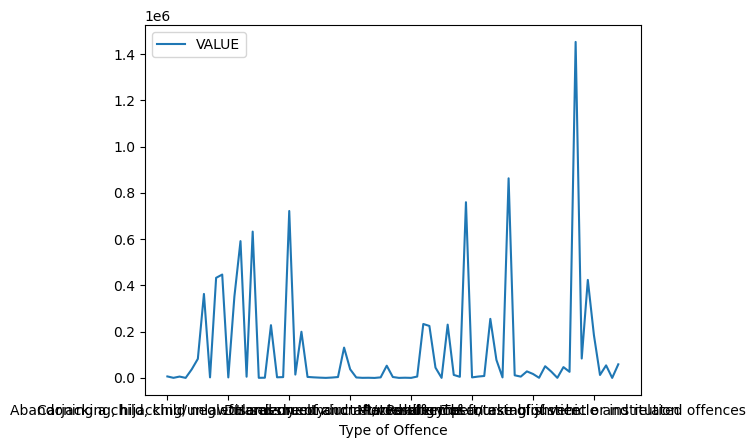

In [84]:

# Resize the chart to be wider
#fig, ax = plt.subplots(figsize=(14, 4))

# Here I will plot a line chart of the population growth for each `Region`
bxplot_crime.plot(kind='line')

ax.set_title('Population by Region over Time in Thousands')
plt.show()